In [8]:
import pandas as pd
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('dataset experiment/experiment data - Sheet1.csv')
df

,Rot 1,Rot 2,Rot 3,Trans X,Trans Y,Trans Z,Score_6D_pose,Score_Yolo,Name,Trans X icp,...,Rot 2 icp,Rot 3 icp,RMSE icp,Trans X cam,Trans Y cam,Trans Z cam,N points icp,icp,gripping_result,Alone
0,0.048371,-0.164065,0.446165,0.404530,-0.104605,0.256974,0.982975,0.925293,horse,0.390700,...,-0.067570,-0.350053,0.005588,0.093221,0.056449,0.338958,2054,True,True,True
1,0.113486,0.150252,-0.864894,0.406954,-0.109316,0.248877,0.739151,0.926270,horse,0.383441,...,-0.099733,-0.915558,0.006363,0.099359,0.063131,0.342643,1190,True,True,True
2,0.115148,0.203560,-0.825509,0.430614,0.011852,0.260725,0.722596,0.906738,horse,0.424380,...,-0.055217,-0.587607,0.006411,0.008855,0.061299,0.361406,1114,True,True,True
3,0.053834,0.097514,-0.963508,0.442865,-0.045268,0.251982,0.841273,0.924805,horse,0.428798,...,-0.017805,-0.995866,0.006286,0.064875,0.027292,0.396887,1185,True,True,True
4,0.107384,0.103667,-0.988794,0.496611,-0.100790,0.267857,0.734523,0.911133,horse,0.495871,...,-0.010391,-0.900812,0.005157,0.137625,0.049456,0.395562,1325,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,-0.170207,0.062947,0.367751,0.379064,0.016642,0.283223,0.788293,0.912109,pawn,0.371619,...,-0.028598,-0.455416,0.005668,0.150907,0.045243,0.364718,367,True,False,True
302,-0.218126,-0.135141,0.264017,0.419625,0.055872,0.282469,0.944092,0.907715,pawn,0.419329,...,0.015690,-0.351073,0.006341,0.094813,0.050329,0.364734,264,True,True,True
303,-0.211499,-0.096776,0.274277,0.346066,-0.025451,0.284400,0.869154,0.903320,pawn,0.342351,...,-0.028605,-0.248958,0.004663,0.203439,0.037652,0.371544,431,True,False,True
304,-0.112549,0.061048,0.623588,0.387960,0.002868,0.280297,0.759018,0.864746,pawn,0.380066,...,-0.014253,-0.632247,0.005230,0.153772,0.042520,0.380926,328,True,True,True


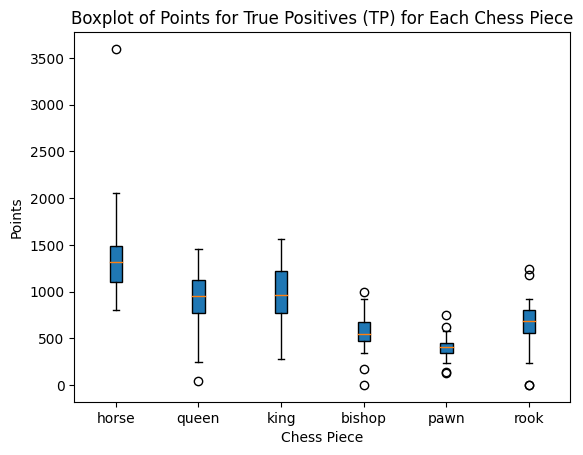

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assuming chess_pieces is a list of piece names
chess_pieces = ['horse', 'queen', 'king', 'bishop', 'pawn', 'rook']

# Create a boxplot for every TP for every chess piece
fig, ax = plt.subplots()
mean_values = {}

# Iterate over each chess piece
for piece_name in chess_pieces:
    # Filter the DataFrame for True Positives (TP) for the current chess piece
    filtered_df = df[(~df['icp']) & (df['Name'] == piece_name)]

    # Get the column names for the points associated with the current chess piece
    points_column_name = f'N points icp'

    # Create a boxplot for the points column of the filtered DataFrame
    box = ax.boxplot(filtered_df[points_column_name], positions=[chess_pieces.index(piece_name) + 1], patch_artist=True)
    mean_values[piece_name] = np.mean(filtered_df[points_column_name])
    
    # Customize the boxplot appearance if needed

# Customize the plot
ax.set_xticks(np.arange(1, len(chess_pieces) + 1))
ax.set_xticklabels(chess_pieces)
ax.set_xlabel('Chess Piece')
ax.set_ylabel('Points')
ax.set_title('Boxplot of Points for True Positives (TP) for Each Chess Piece')

plt.show()

/tmp/ipykernel_21549/3733518901.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Euclidean Distance'] = (np.sqrt(filtered_df['Trans X cam']**2 + filtered_df['Trans Y cam']**2 + filtered_df['Trans Z cam']**2))*1000


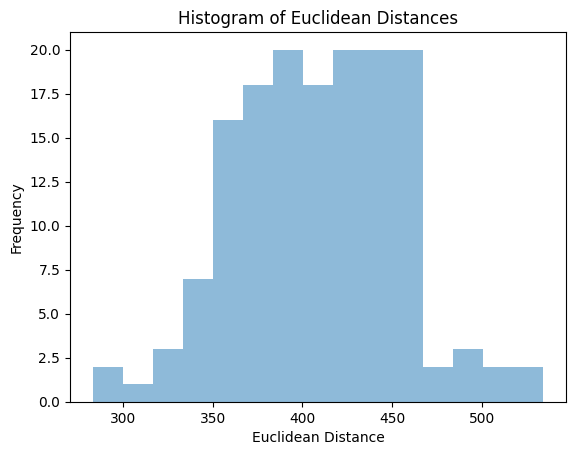

/tmp/ipykernel_21549/3733518901.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Euclidean Distance'] = (np.sqrt(filtered_df['Trans X cam']**2 + filtered_df['Trans Y cam']**2 + filtered_df['Trans Z cam']**2))*1000


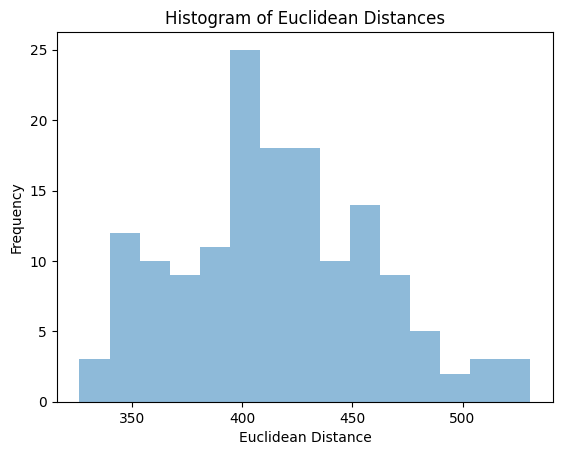

In [3]:
filtered_df = df[~df['icp']]
# Assuming 'Trans X cam', 'Trans Y cam', and 'Trans Z cam' are columns in filtered_df
filtered_df['Euclidean Distance'] = (np.sqrt(filtered_df['Trans X cam']**2 + filtered_df['Trans Y cam']**2 + filtered_df['Trans Z cam']**2))*1000

# Plot histogram of Euclidean Distance
plt.hist(filtered_df['Euclidean Distance'], bins=15, alpha=0.5)

# Add labels and title
plt.xlabel('Euclidean Distance')
plt.ylabel('Frequency')
plt.title('Histogram of Euclidean Distances')

# Show the plot
plt.show()

filtered_df = df[df['icp']]
# Assuming 'Trans X cam', 'Trans Y cam', and 'Trans Z cam' are columns in filtered_df
filtered_df['Euclidean Distance'] = (np.sqrt(filtered_df['Trans X cam']**2 + filtered_df['Trans Y cam']**2 + filtered_df['Trans Z cam']**2))*1000

# Plot histogram of Euclidean Distance
plt.hist(filtered_df['Euclidean Distance'], bins=15, alpha=0.5)

# Add labels and title
plt.xlabel('Euclidean Distance')
plt.ylabel('Frequency')
plt.title('Histogram of Euclidean Distances')

# Show the plot
plt.show()

In [4]:
# Count the number of True and False values in the 'icp' column
icp_counts = df['icp'].value_counts()

# Display the counts
print("The ICP counts", icp_counts, '\n')

result_counts = df.groupby(['icp', 'gripping_result']).size().unstack(fill_value=0)

# Display the counts
print(result_counts)

The ICP counts icp
False    154
True     152
Name: count, dtype: int64 

gripping_result  False  True 
icp                          
False               74     80
True                45    107


In [5]:
# Group the DataFrame by 'Name' and count the number of True and False values in 'icp' for each group
result = df.groupby('Name')['icp'].value_counts()

# Display the counts
print(result,'\n')

# Group the DataFrame by 'Name' and count the number of True and False values in both 'icp' and 'gripping_result' for each group
result = df.groupby('Name')[['icp', 'gripping_result']].value_counts()

# Display the counts
display(result)

Name    icp  
bishop  False    25
        True     25
horse   False    27
        True     26
king    False    26
        True     25
pawn    False    25
        True     25
queen   True     26
        False    25
rook    False    26
        True     25
Name: count, dtype: int64 



Name    icp    gripping_result
bishop  True   True               20
        False  False              14
               True               11
        True   False               5
horse   True   True               21
        False  True               18
               False               9
        True   False               5
king    True   True               18
        False  True               14
               False              12
        True   False               7
pawn    False  False              16
        True   True               15
               False              10
        False  True                9
queen   True   True               20
        False  True               15
               False              10
        True   False               6
rook    False  False              13
               True               13
        True   True               13
               False              12
Name: count, dtype: int64

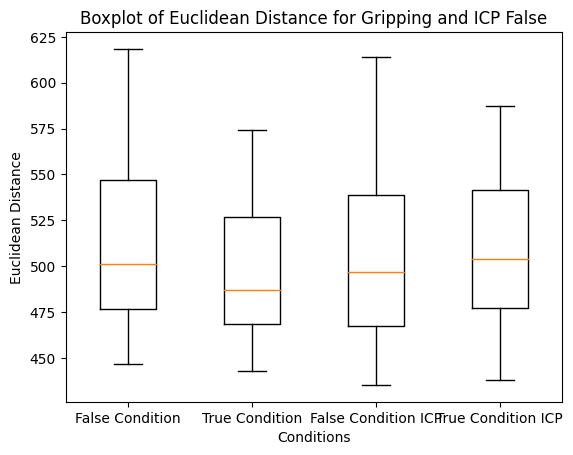

In [32]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('dataset experiment/experiment data - Sheet1.csv')
df['Euclidean Distance'] = np.sqrt(df['Trans X icp']**2 + df['Trans Y icp']**2 + df['Trans Z icp']**2)*1000
# Create a boxplot for the 'Euclidean Distance' column
false_condition = (df['gripping_result'] == False) & (df['icp'] == False)
true_condition = (df['gripping_result'] == True) & (df['icp'] == False)
false_condition_icp = (df['gripping_result'] == False) & (df['icp'] == True)
true_condition_icp = (df['gripping_result'] == True) & (df['icp'] == True)

# Create a boxplot for each condition
plt.boxplot([df.loc[false_condition]['Euclidean Distance'], df.loc[true_condition]['Euclidean Distance'], df.loc[false_condition_icp]['Euclidean Distance'], df.loc[true_condition_icp]['Euclidean Distance']],
            labels=['False Condition', 'True Condition','False Condition ICP', 'True Condition ICP'])

plt.title('Boxplot of Euclidean Distance for Gripping and ICP False')
plt.xlabel('Conditions')
plt.ylabel('Euclidean Distance')
plt.show()

In [19]:
df.loc[df['gripping_result']==True]['Euclidean Distance'].mean()

504.24597508548123

In [21]:
df

,Rot 1,Rot 2,Rot 3,Trans X,Trans Y,Trans Z,Score_6D_pose,Score_Yolo,Name,Trans X icp,Trans Y icp,Trans Z icp,Rot 1 icp,Rot 2 icp,Rot 3 icp,RMSE icp,Trans X cam,Trans Y cam,Trans Z cam,N points icp,icp,gripping_result,Alone,Euclidean Distance
0,0.048371,-0.164065,0.446165,0.404530,-0.104605,0.256974,0.982975,0.925293,horse,0.390700,-0.108959,0.268054,-0.000915,-0.067570,-0.350053,0.005588,0.093221,0.056449,0.338958,2054,True,True,True,486.180325
1,0.113486,0.150252,-0.864894,0.406954,-0.109316,0.248877,0.739151,0.926270,horse,0.383441,-0.113349,0.267768,-0.046997,-0.099733,-0.915558,0.006363,0.099359,0.063131,0.342643,1190,True,True,True,481.221886
2,0.115148,0.203560,-0.825509,0.430614,0.011852,0.260725,0.722596,0.906738,horse,0.424380,0.006984,0.263731,0.015509,-0.055217,-0.587607,0.006411,0.008855,0.061299,0.361406,1114,True,True,True,499.700847
3,0.053834,0.097514,-0.963508,0.442865,-0.045268,0.251982,0.841273,0.924805,horse,0.428798,-0.050250,0.264616,-0.040522,-0.017805,-0.995866,0.006286,0.064875,0.027292,0.396887,1185,True,True,True,506.373945
4,0.107384,0.103667,-0.988794,0.496611,-0.100790,0.267857,0.734523,0.911133,horse,0.495871,-0.099131,0.266402,-0.005565,-0.010391,-0.900812,0.005157,0.137625,0.049456,0.395562,1325,True,True,True,571.563872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,-0.170207,0.062947,0.367751,0.379064,0.016642,0.283223,0.788293,0.912109,pawn,0.371619,0.005527,0.283608,-0.139417,-0.028598,-0.455416,0.005668,0.150907,0.045243,0.364718,367,True,False,True,467.509267
302,-0.218126,-0.135141,0.264017,0.419625,0.055872,0.282469,0.944092,0.907715,pawn,0.419329,0.046565,0.286584,0.011782,0.015690,-0.351073,0.006341,0.094813,0.050329,0.364734,264,True,True,True,510.034768
303,-0.211499,-0.096776,0.274277,0.346066,-0.025451,0.284400,0.869154,0.903320,pawn,0.342351,-0.040990,0.284958,0.053791,-0.028605,-0.248958,0.004663,0.203439,0.037652,0.371544,431,True,False,True,447.309373
304,-0.112549,0.061048,0.623588,0.387960,0.002868,0.280297,0.759018,0.864746,pawn,0.380066,0.000474,0.285725,0.081546,-0.014253,-0.632247,0.005230,0.153772,0.042520,0.380926,328,True,True,True,475.488932
